DSCI 100 Group 41 Proposal

Title: Customer Analysis of Shipment Reviews

Introduction:

- Having the ability to buy anything with a touch of a button is becoming increasingly popular with the rapid growth of e-commerce and development of transportation methods through the years. As a way to help businesses determine the best way to ship their products, it is crucial to understand customer feedback on past shipments. To ensure that past customers are satisfied with their experience, often leading to an increase in profits, all the components of shipping any kind of parcel or package are analyzed in this project.

- With this project, the question we will try to answer is: What is the most efficient way to ship parcels based on their weight in grams and product cost?

- To answer this question, we will use a dataset from Kaggle named "On-Time Delivery" and contains 12 columns with correlations to a thorough examination of the customer experience. Its columns contains details about every parcel sent including the product cost, product importance, discount offered, and weight in grams of the package. It also has the mode of shipment, customer ratings, and whether or not the package reached on time. contains 12 columns with correlations to a thorough examination of the customer experience.

Preliminary Explanatory Data Analysis:

- Dataset is read into R

In [4]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [ ]:
On_Time_Data <- read_csv("Train_new.csv")
On_Time_Data

Rows: 10999 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Warehouse_block, Mode_of_Shipment, Product_importance, Gender
dbl (8): ID, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
6,F,Flight,3,1,162,3,medium,F,12,1417,1
7,D,Flight,3,4,250,3,low,F,3,2371,1
8,F,Flight,4,1,233,2,low,F,48,2804,1
9,A,Flight,3,4,150,3,low,F,11,1861,1


- Cleaned & wrangled data into a tidy format

In [41]:
On_Time_Data_Final <- On_Time_Data |>
                      select (ID, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Weight_in_gms, Reached.on.Time_Y.N) |>
                      filter (Reached.on.Time_Y.N == 1)
On_Time_Data_Final

ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Flight,4,2,177,1233,1
2,Flight,4,5,216,3088,1
3,Flight,2,2,183,3374,1
4,Flight,3,3,176,1177,1
5,Flight,2,2,184,2484,1
6,Flight,3,1,162,1417,1
7,Flight,3,4,250,2371,1
8,Flight,4,1,233,2804,1
9,Flight,3,4,150,1861,1


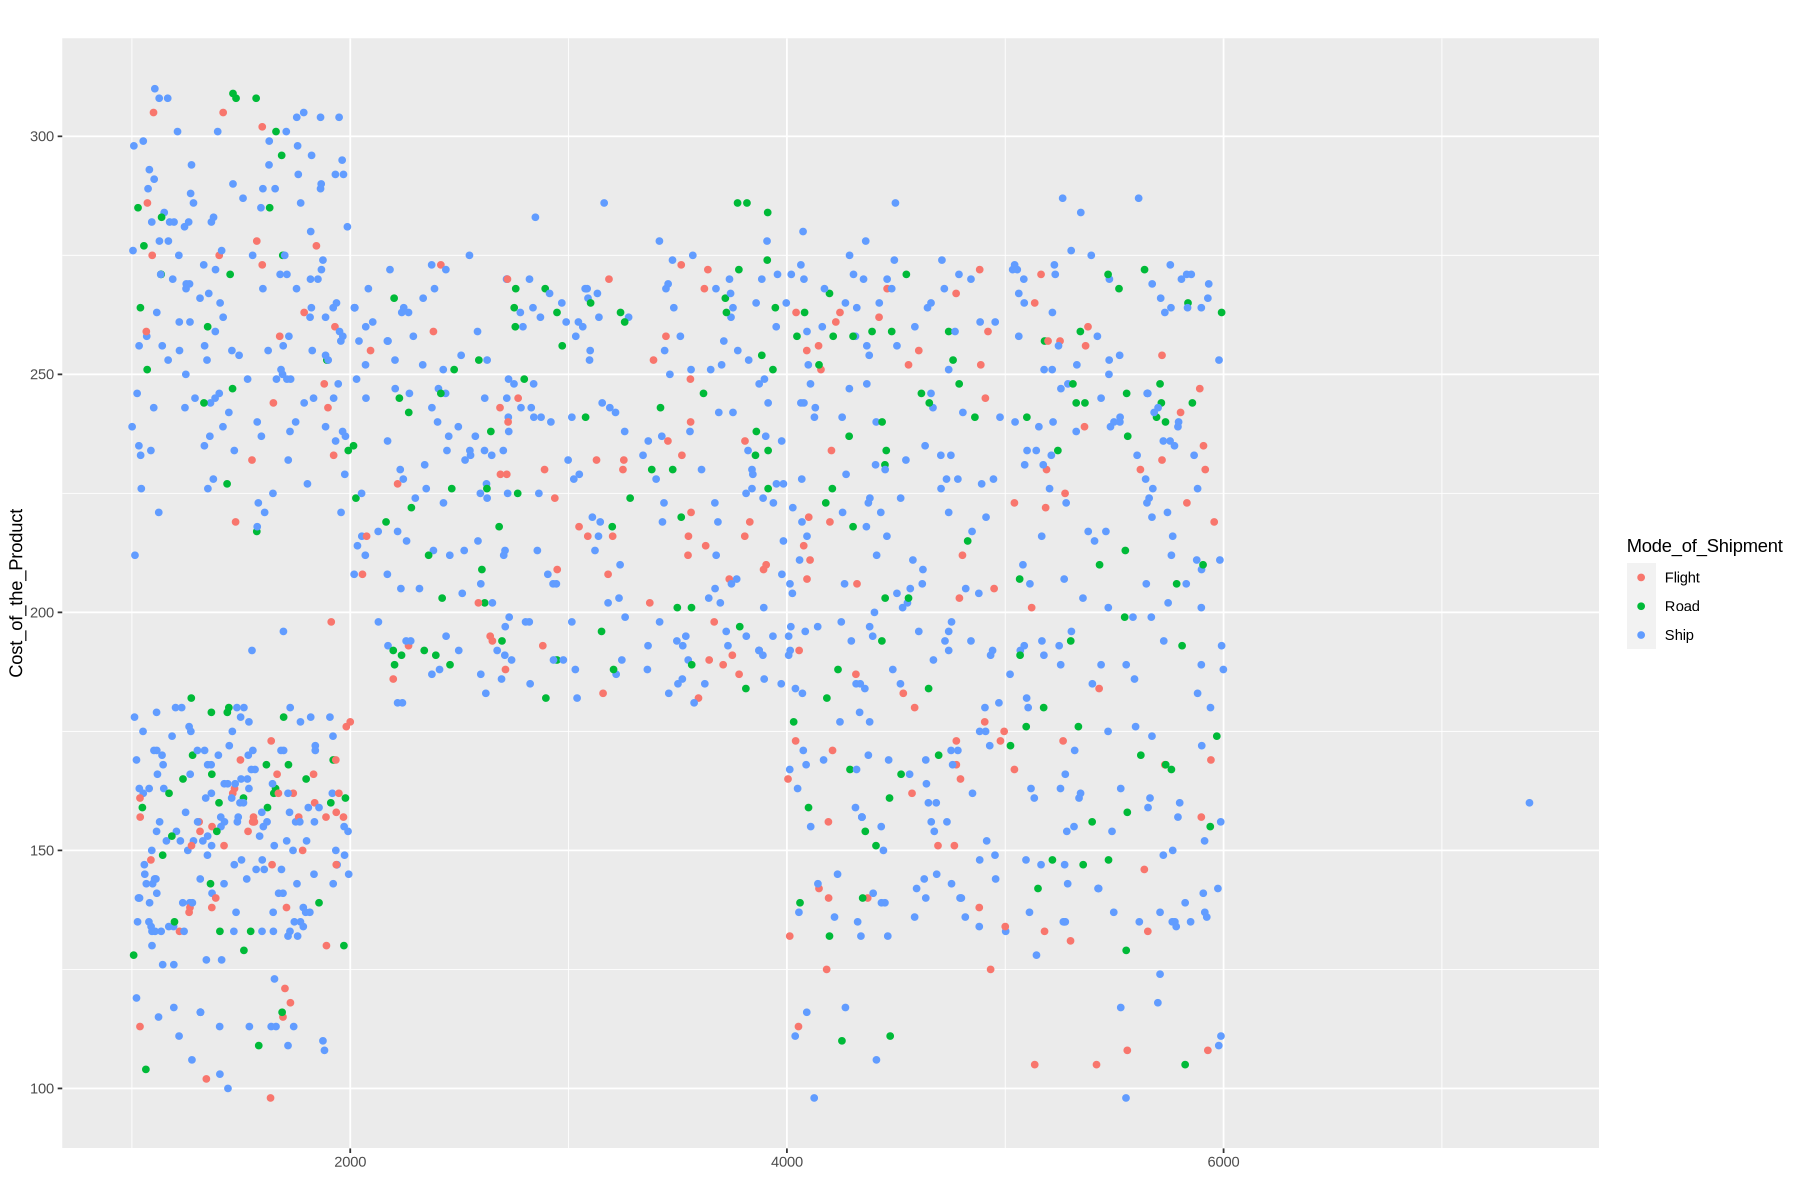

In [124]:
options(repr.plot.width = 15, repr.plot.height = 10)
On_Time_Data_Grouped<- On_Time_Data|>
    select(Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Weight_in_gms, Reached.on.Time_Y.N)|>
    filter(Reached.on.Time_Y.N==1, Customer_rating==5)

On_Time_Plot<-On_Time_Data_Grouped|>
    ggplot(aes(x=Weight_in_gms, y=Cost_of_the_Product, color=Mode_of_Shipment)) + 
        geom_point() + 
        labs(x = "",
             fill = "",)+
             ggtitle("")
        
On_Time_Plot

-Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

-Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Methods:

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

- Since we care about the shipping methods, the variables/columns we will be using are ‘Mode of Shipment’ and ‘Reached on Time’ to try to directly compare the shipping methods of ‘Flight, Ship and Road’, and further use ‘Customer Care Calls’ and ‘Customer Rating’ as a guideline for the levels of customer satisfaction (an indication of customer experience). For this specific data analysis, we would like to use the columns ‘Weight in Grams’ and ‘Product Cost’ to determine the optimal method of shipping based on the specifications of the package being sent. 

Describe at least one way that you will visualize the results
- To visualize our results, we would like to 

Expected outcomes and significance:

What do you expect to find?
- We expect to produce a clear visualization of the current shipment patterns and relate them with customer feedback. Thus, we hope to find a clear answer to our question and help businesses improve their shipping capabilities. 

What impact could such findings have?
- By analyzing shipping methods, we hope to identify patterns and trends in shipping data to improve  efficiency and help businesses set accurate expectations for customers. In businesses, reliability and timely shipping is a key factor in customer satisfaction so identifying the most efficient method to meet delivery timelines will be essential in increasing profits and developing overall operations.

What future questions could this lead to?
- Some further questions with this project are connecting the findings with other technologies to better shipments like: What are new alternative shipping methods that offer a better cost-to-performance ratio? What are the best shipping routes in terms of cost and time efficiency? 
Or we could even delve into the effects of these shipping methods by connecting it to their fuel emissions and climate change with what is the most environmentally friendly method of shipping packages that will not sacrifice cost and time?

- Cleaned & wrangled data into a tidy format

In [9]:
On_Time_Data_Final <- On_Time_Data |>
                      select (ID, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Weight_in_gms, Reached.on.Time_Y.N) |>
                      filter (Customer_care_calls < 3, Customer_rating > 3, Reached.on.Time_Y.N == 1)
On_Time_Data_Final

ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Weight_in_gms,Reached.on.Time_Y.N
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23,Ship,2,5,156,1750,1
38,Ship,2,4,181,3605,1
56,Ship,2,5,246,2437,1
82,Ship,2,5,132,1759,1
119,Road,2,5,263,2947,1
189,Ship,2,5,139,1233,1
190,Ship,2,4,134,1415,1
191,Ship,2,5,130,1092,1
192,Ship,2,5,133,1596,1


-Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [18]:
data_split <- initial_split (On_Time_Data_Final, prop = 0.75, strata = Mode_of_Shipment)
training_data <- training (data_split)
testing_data <- testing (data_split)
data_class <- training_data |>
              group_by (Mode_of_Shipment) |>
              summarize (n = n ())
data_class
data_recipe <- training_data |>
               recipe (Mode_of_Shipment ~., strata = training_data) |>
               step_scale (all_predictors ()) |>
               step_center (all_predictors ()) |>
               prep ()
data_recipe

Mode_of_Shipment,n
<chr>,<int>
Flight,19
Road,21
Ship,83


Warning message:
“Column(s) have zero variance so scaling cannot be used: `Customer_care_calls` and `Reached.on.Time_Y.N`. Consider using `step_zv()` to remove those columns before normalizing”


── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 6



── Training information 

Training data contained 123 data points and no incomplete rows.



── Operations 

• Scaling for: ID, Customer_care_calls, Customer_rating, ... | Trained

• Centering for: ID, Customer_care_calls, Customer_rating, ... | Trained



-Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Methods:

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

- Since we care about the shipping methods, the variables/columns we will be using are ‘Mode of Shipment’ and ‘Reached on Time’ to try to directly compare the shipping methods of ‘Flight, Ship and Road’, and further use ‘Customer Care Calls’ and ‘Customer Rating’ as a guideline for the levels of customer satisfaction (an indication of customer experience). For this specific data analysis, we would like to use the columns ‘Weight in Grams’ and ‘Product Cost’ to determine the optimal method of shipping based on the specifications of the package being sent. 

Describe at least one way that you will visualize the results
- To visualize our results, we would like to use a scatterplot where weight and price are the axis while each point will be classified depending on the mode of transportation used.

Expected outcomes and significance:

What do you expect to find?
- We expect to produce a clear visualization of the current shipment patterns and relate them with customer feedback. Thus, we hope to find a clear answer to our question and help businesses improve their shipping capabilities. 

What impact could such findings have?
- By analyzing shipping methods, we hope to identify patterns and trends in shipping data to improve  efficiency and help businesses set accurate expectations for customers. In businesses, reliability and timely shipping is a key factor in customer satisfaction so identifying the most efficient method to meet delivery timelines will be essential in increasing profits and developing overall operations.

What future questions could this lead to?
- Some further questions with this project are connecting the findings with other technologies to better shipments like: What are new alternative shipping methods that offer a better cost-to-performance ratio? What are the best shipping routes in terms of cost and time efficiency? 
Or we could even delve into the effects of these shipping methods by connecting it to their fuel emissions and climate change with what is the most environmentally friendly method of shipping packages that will not sacrifice cost and time?